# Aprendizagem de Máquina I

## Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

O objetivo dessa atividade é trabalhar o KNN e as árvores de classificação com dados artificiais. Vamos lá!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_blobs, make_multilabel_classification

In [180]:
# FONTE: https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%209.ipynb (com modificações)

def plot_clf(clf, X_train, y_train, X_test, y_test, h=0.02, pad=0.25):
    # Make grid
    x_min, x_max = X_train[:, 0].min()-pad, X_train[:, 0].max()+pad
    y_min, y_max = X_train[:, 1].min()-pad, X_train[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot train
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 5)
    ax1.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    ax1.scatter(X_train[:,0], X_train[:,1], s=70, c=y_train, cmap=plt.cm.Paired)
    ax1.set_title('Train set')

    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')

    # Plot test
    ax2.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    ax2.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
    ax2.set_title('Test set')

    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(y_min, y_max)
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    
    plt.show()

    print('==== MÉTRICAS ====')
    CM = metrics.confusion_matrix(y_test, clf.predict(X_test))

    Pop = np.size(y_test)
    N = np.size(np.where(y_test == 0))
    P = np.size(np.where(y_test == 1))

    VN = CM[0, 0]
    FP = CM[0, 1]
    FN = CM[1, 0]
    VP = CM[1, 1]

    Prev = P/Pop
    Acc = (VN + VP)/Pop

    FPR = FP/N
    TNR = VN/N
    TPR = VP/P
    FNR = FN/P

    FOR = FN/(VN + FN)
    PPV = VP/(FP + VP)
    NPV = VN/(VN + FN)
    FDR = FP/(FP + VP)

    F1 = 2/(1/PPV + 1/TPR)
    
    print('Prevalência:', Prev)
    print('Acurácia:', Acc)

    print('\nMatriz de confusão:')
    matprint(CM)

    print('\nTaxa de falsos positivos:', FPR)
    print('Taxa de verdadeiros negativos (Especificidade):', TNR)
    print('Taxa de verdadeiros positivos (Recall):', TPR)
    print('Taxa de falsos negativos:', FNR)

    print('\nFalse omission rate:', FOR)
    print('Valor preditivo positivo (Precisão):', PPV)
    print('Valor preditivo negativo:', NPV)
    print('False discovery rate:', FDR)

    print('\nF1 Score:', F1)

########## PRETTY MATRIX DISPLAY ##########
# Source: https://gist.github.com/braingineer/d801735dac07ff3ac4d746e1f218ab75
def matprint(mat, fmt="g", round_dig = 0):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            if round_dig == 0:
                print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
            else:
                print(("{:"+str(col_maxes[i])+fmt+"}").format(round(y, round_dig)), end="  ")
        print("")
###########################################

a) Escolha algum dos conjuntos de dados artificiais abaixo.

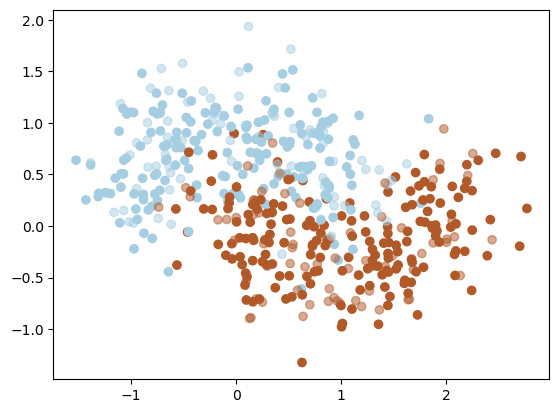

In [187]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

X, y = make_moons(n_samples = 500, noise = 0.3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

plt.scatter(*X_train.T, c = y_train, alpha = 1, cmap = plt.cm.Paired)
plt.scatter(*X_test.T, c = y_test, alpha = 0.5, cmap = plt.cm.Paired)

plt.show()

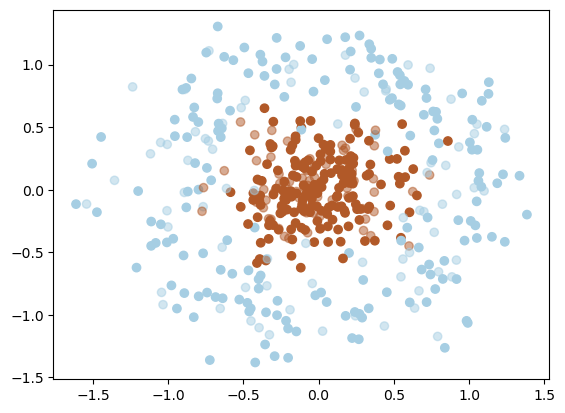

In [185]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

X, y = make_circles(n_samples = 500, noise = 0.25, factor = 0.15)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

plt.scatter(*X_train.T, c = y_train, alpha = 1, cmap = plt.cm.Paired)
plt.scatter(*X_test.T, c = y_test, alpha = 0.5, cmap = plt.cm.Paired)

plt.show()

b) No conjunto de dados que você escolheu acima teste o KNN e diversos valores do(s) seu(s) hiperparâmetro(s). Estude a documentação para entender do que se tratam tal(is) hiperparâmetro(s). Escolha o(s) melhor(es) hiperparâmetro(s) através de validação cruzada.

c) No conjunto de dados que você escolheu acima teste árvores de decisão e diversos valores do(s) seu(s) hiperparâmetro(s). Estude a documentação para entender do que se tratam tal(is) hiperparâmetro(s). Escolha o(s) melhor(es) hiperparâmetro(s) através de validação cruzada.

d) No conjunto de dados que você escolheu acima teste árvores de decisão em *bagging* e florestas aleatórias e diversos valores do(s) seu(s) hiperparâmetro(s). Estude a documentação para entender do que se tratam tal(is) hiperparâmetro(s). Escolha o(s) melhor(es) hiperparâmetro(s) através de validação cruzada.